In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import warnings
import utils
warnings.filterwarnings("ignore")

from scipy import stats
from scipy.stats.stats import pearsonr   
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime, timedelta

params = utils.Params('init_params.json')

In [2]:
csv_path = params.csv_path
dataset = params.dataset
window_size = params.window_size
stride_size = params.stride_size
num_covariates = params.num_covariates
pred_days= params.pred_days

In [3]:
lag= window_size-pred_days-stride_size

### Load Data 

In [4]:
df_org=pd.read_csv(csv_path, index_col='Date', parse_dates=['Date'])
print('Number of rows and columns:', df_org.shape)
# Looking at the PM2.5 column
df = df_org.copy()
df.head(5)

Number of rows and columns: (2342, 10)


,PM2.5,PM10,SO2,CO,NOx,O3,WS,Temp,RH,RF
Date,,,,,,,,,,
2013-01-01,240.365653,404.141923,4.0392,0.3567,19.6254,6.5769,1.3795,17.8800,69.8887,0.0583
2013-01-02,267.760636,447.535746,3.9436,0.3086,13.4329,4.5049,1.4104,18.6961,67.1973,0.0467
2013-01-03,262.088263,449.070512,3.8702,0.3405,16.0926,5.3954,1.6614,20.0829,68.4158,0.0482
2013-01-04,222.661851,372.724157,4.2239,0.3858,19.5855,6.5480,1.2790,20.1200,70.4625,0.0226
2013-01-05,164.089142,278.164502,4.0392,0.5365,31.8197,10.6209,1.3413,18.7043,62.1733,0.0200


### Multiple Linear regression

In [14]:
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import shap

In [49]:
X = df[['WS','Temp','RH','RF','NOx','SO2','O3','CO']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['PM2.5']

# Split the data into train and test data:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)


In [52]:
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

### Shap Variable Importance

In [53]:
explainer = shap.KernelExplainer(model = model.predict,  data = X)

Using 2342 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/2342 [00:00<?, ?it/s]

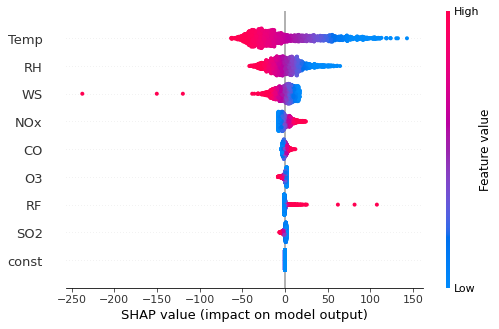

In [54]:
shap_values = explainer.shap_values(X, nsamples=500)
shap.summary_plot(shap_values, X)